# Apartment Rent Prediction

## Importing the data

In [1]:
import pandas as pd
import numpy as np

est=pd.read_csv(r'C:/Users/user/Documents/ΔΙΚΑ ΜΟΥ/DS Projects/Webscraping/apartments.csv')
est.head()

,Category,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Διαμέρισμα 40 τ.μ.,Ισόγειο,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×2010,6 €/τ.μ.,250 €
2,Μονοκατοικία 75 τ.μ.,Ισόγειο,×3,×1,Δ. Βασιλικών | Ενοικίαση κατοικί...,×1990,6 €/τ.μ.,450 €
3,Διαμέρισμα 67 τ.μ.,Ημιώροφος,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×1990,6 €/τ.μ.,400 €
4,Διαμέρισμα 32 τ.μ.,1ος,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×1989,7 €/τ.μ.,230 €


## Data Wrangling

In [2]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         1805 non-null   object
 1   Floor            1805 non-null   object
 2   Bedrooms         1805 non-null   object
 3   Bathrooms        1805 non-null   object
 4   Area             1805 non-null   object
 5   Year             1805 non-null   object
 6   Price/m2(€/m^2)  1805 non-null   object
 7   Price(€)         1805 non-null   object
dtypes: object(8)
memory usage: 128.2+ KB


In [3]:
est.shape

(2050, 8)

 **Dealing with missing values and duplicates**

In [4]:
est.dropna(inplace=True)
est.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1805 entries, 1 to 2048
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         1805 non-null   object
 1   Floor            1805 non-null   object
 2   Bedrooms         1805 non-null   object
 3   Bathrooms        1805 non-null   object
 4   Area             1805 non-null   object
 5   Year             1805 non-null   object
 6   Price/m2(€/m^2)  1805 non-null   object
 7   Price(€)         1805 non-null   object
dtypes: object(8)
memory usage: 126.9+ KB


In [5]:
est.drop_duplicates(inplace=True)
est.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 1 to 2048
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         1782 non-null   object
 1   Floor            1782 non-null   object
 2   Bedrooms         1782 non-null   object
 3   Bathrooms        1782 non-null   object
 4   Area             1782 non-null   object
 5   Year             1782 non-null   object
 6   Price/m2(€/m^2)  1782 non-null   object
 7   Price(€)         1782 non-null   object
dtypes: object(8)
memory usage: 125.3+ KB


**Use str.split to split the Category column to Type and Surface**

In [6]:
est[['Type','Surface m^2']]=est['Category'].str.split(" ",n=1, expand=True)
est.head()

,Category,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Διαμέρισμα 40 τ.μ.,Ισόγειο,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×2010,6 €/τ.μ.,250 €,Διαμέρισμα,40 τ.μ.
2,Μονοκατοικία 75 τ.μ.,Ισόγειο,×3,×1,Δ. Βασιλικών | Ενοικίαση κατοικί...,×1990,6 €/τ.μ.,450 €,Μονοκατοικία,75 τ.μ.
3,Διαμέρισμα 67 τ.μ.,Ημιώροφος,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×1990,6 €/τ.μ.,400 €,Διαμέρισμα,67 τ.μ.
4,Διαμέρισμα 32 τ.μ.,1ος,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×1989,7 €/τ.μ.,230 €,Διαμέρισμα,32 τ.μ.
5,Διαμέρισμα 30 τ.μ.,Ημιυπόγειο,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×2005,4 €/τ.μ.,120 €,Διαμέρισμα,30 τ.μ.


In [7]:
est.drop(columns=['Category'], inplace=True)
est.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Ισόγειο,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×2010,6 €/τ.μ.,250 €,Διαμέρισμα,40 τ.μ.
2,Ισόγειο,×3,×1,Δ. Βασιλικών | Ενοικίαση κατοικί...,×1990,6 €/τ.μ.,450 €,Μονοκατοικία,75 τ.μ.
3,Ημιώροφος,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×1990,6 €/τ.μ.,400 €,Διαμέρισμα,67 τ.μ.
4,1ος,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×1989,7 €/τ.μ.,230 €,Διαμέρισμα,32 τ.μ.
5,Ημιυπόγειο,×1,×1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,×2005,4 €/τ.μ.,120 €,Διαμέρισμα,30 τ.μ.


**Lets get rid off string characters and convert the numeric values to type int**

In [8]:
est['Bedrooms']=est['Bedrooms'].str.replace(r'\D','').astype(int)
est['Bathrooms']=est['Bathrooms'].str.replace(r'\D','').astype(int)
est['Price(€)']=est['Price(€)'].str.replace(r'\D','').astype(int)
est['Surface m^2']=est['Surface m^2'].str.replace(r'\D','').astype(int)
est['Year']=est['Year'].str.replace(r'\D','').astype(int)
est['Price/m2(€/m^2)']=est['Price/m2(€/m^2)'].str.replace(r'\D','').astype(int)
est['Floor']=est['Floor'].str.replace(r',','')

C:\Users\user\AppData\Local\Temp\ipykernel_11440\3454292683.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  est['Bedrooms']=est['Bedrooms'].str.replace(r'\D','').astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11440\3454292683.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  est['Bathrooms']=est['Bathrooms'].str.replace(r'\D','').astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11440\3454292683.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  est['Price(€)']=est['Price(€)'].str.replace(r'\D','').astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11440\3454292683.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  est['Surface m^2']=est['Surface m^2'].str.replace(r'\D','').astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11440\3454292683.py:5: FutureWarning:

In [9]:
est.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Ισόγειο,1,1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,2010,6,250,Διαμέρισμα,40
2,Ισόγειο,3,1,Δ. Βασιλικών | Ενοικίαση κατοικί...,1990,6,450,Μονοκατοικία,75
3,Ημιώροφος,1,1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,1990,6,400,Διαμέρισμα,67
4,1ος,1,1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,1989,7,230,Διαμέρισμα,32
5,Ημιυπόγειο,1,1,Πολίχνη Θεσσαλονίκης | Ενοικίαση...,2005,4,120,Διαμέρισμα,30


In [10]:
est.Area=est.Area.apply(lambda x: x.split('|')[0]) 
est.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Ισόγειο,1,1,Πολίχνη Θεσσαλονίκης,2010,6,250,Διαμέρισμα,40
2,Ισόγειο,3,1,Δ. Βασιλικών,1990,6,450,Μονοκατοικία,75
3,Ημιώροφος,1,1,Πολίχνη Θεσσαλονίκης,1990,6,400,Διαμέρισμα,67
4,1ος,1,1,Πολίχνη Θεσσαλονίκης,1989,7,230,Διαμέρισμα,32
5,Ημιυπόγειο,1,1,Πολίχνη Θεσσαλονίκης,2005,4,120,Διαμέρισμα,30


In [11]:
# A function that removes unwanted string characters such as "()"
def refine (text):
    x=text.split(' ')
    for i,string in enumerate(x):
        x[i]=x[i].strip('()')
        if (string=="Θεσσαλονίκη" or string=="Θεσσαλονίκης"):
            x[i]="" 
    y=' '.join(x)
    z=y.strip()
    return z        

In [12]:
est['Area']=est['Area'].apply(refine)
est.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Ισόγειο,1,1,Πολίχνη,2010,6,250,Διαμέρισμα,40
2,Ισόγειο,3,1,Δ. Βασιλικών,1990,6,450,Μονοκατοικία,75
3,Ημιώροφος,1,1,Πολίχνη,1990,6,400,Διαμέρισμα,67
4,1ος,1,1,Πολίχνη,1989,7,230,Διαμέρισμα,32
5,Ημιυπόγειο,1,1,Πολίχνη,2005,4,120,Διαμέρισμα,30


In [13]:
est.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Ισόγειο,1,1,Πολίχνη,2010,6,250,Διαμέρισμα,40
2,Ισόγειο,3,1,Δ. Βασιλικών,1990,6,450,Μονοκατοικία,75
3,Ημιώροφος,1,1,Πολίχνη,1990,6,400,Διαμέρισμα,67
4,1ος,1,1,Πολίχνη,1989,7,230,Διαμέρισμα,32
5,Ημιυπόγειο,1,1,Πολίχνη,2005,4,120,Διαμέρισμα,30


In [14]:
est['Area'].value_counts()

Κέντρο                      265
Ανάληψη                     186
Φάληρο                      133
Ανω Πόλη                    123
Ντεπώ                        91
                           ... 
Thessaloniki Νέα Ελβετία      1
Μελισσοχώρι                   1
Μενεμένη Αμπελόκηποι          1
Νέα Κεράσια                   1
Πυλαία Νέα Ελβετία            1
Name: Area, Length: 95, dtype: int64

**There are 95 different city areas. We will rename those areas that come up less than 10 times to "Other Area"**

In [15]:
area_stats=est.groupby('Area')['Area'].agg('count').sort_values(ascending=True)
area_stats

Area
Μακρύγιαλος      1
Ζαγκλιβέρι       1
Κιλκίς           1
Κύμινα           1
Λαγυνά           1
              ... 
Ντεπώ           91
Ανω Πόλη       123
Φάληρο         133
Ανάληψη        186
Κέντρο         265
Name: Area, Length: 95, dtype: int64

In [16]:
len(area_stats[area_stats<=10])

68

In [17]:
area=area_stats[area_stats<=10]
area

Area
Μακρύγιαλος    1
Ζαγκλιβέρι     1
Κιλκίς         1
Κύμινα         1
Λαγυνά         1
              ..
Τρίλοφος       6
Σίνδος         7
Δικαστήρια     7
Μενεμένη       9
Θέρμη          9
Name: Area, Length: 68, dtype: int64

In [18]:
est.Area=est.Area.apply(lambda x: "Other Area" if x in area else x)
len(est.Area.unique())

28

In [19]:
est.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Ισόγειο,1,1,Πολίχνη,2010,6,250,Διαμέρισμα,40
2,Ισόγειο,3,1,Other Area,1990,6,450,Μονοκατοικία,75
3,Ημιώροφος,1,1,Πολίχνη,1990,6,400,Διαμέρισμα,67
4,1ος,1,1,Πολίχνη,1989,7,230,Διαμέρισμα,32
5,Ημιυπόγειο,1,1,Πολίχνη,2005,4,120,Διαμέρισμα,30


**Now that we cleaned our data we will make a copy of our dataframe and move on to analyse them**

In [20]:
cleaned=est.copy()
cleaned.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1,Ισόγειο,1,1,Πολίχνη,2010,6,250,Διαμέρισμα,40
2,Ισόγειο,3,1,Other Area,1990,6,450,Μονοκατοικία,75
3,Ημιώροφος,1,1,Πολίχνη,1990,6,400,Διαμέρισμα,67
4,1ος,1,1,Πολίχνη,1989,7,230,Διαμέρισμα,32
5,Ημιυπόγειο,1,1,Πολίχνη,2005,4,120,Διαμέρισμα,30


## Exploratory Data Analysis

In [21]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 1 to 2048
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Floor            1782 non-null   object
 1   Bedrooms         1782 non-null   int32 
 2   Bathrooms        1782 non-null   int32 
 3   Area             1782 non-null   object
 4   Year             1782 non-null   int32 
 5   Price/m2(€/m^2)  1782 non-null   int32 
 6   Price(€)         1782 non-null   int32 
 7   Type             1782 non-null   object
 8   Surface m^2      1782 non-null   int32 
dtypes: int32(6), object(3)
memory usage: 97.5+ KB


### Data Visualization

In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# A function for plotting barplots
def plots(df, colname, xsize, ysize):
    fig = plt.figure(figsize = (xsize, ysize))
    plt.bar(df[colname].unique(),df[colname].value_counts(sort=False))
    plt.xlabel("Number of {}".format(colname))
    plt.ylabel("{} Count".format(colname))
    plt.title("{}".format(colname))

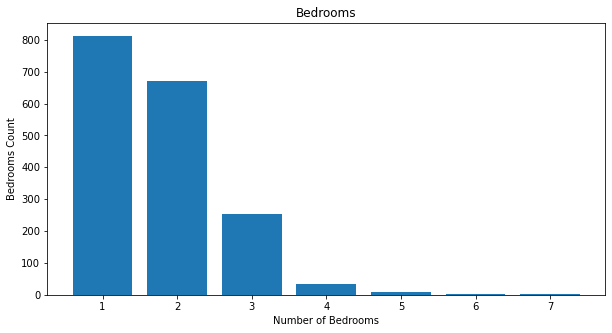

In [24]:
plots(cleaned,"Bedrooms",10,5)

**The majority of the houses have less than 4 bedrooms and most of them are either 1 or 2 bedroom apartments**

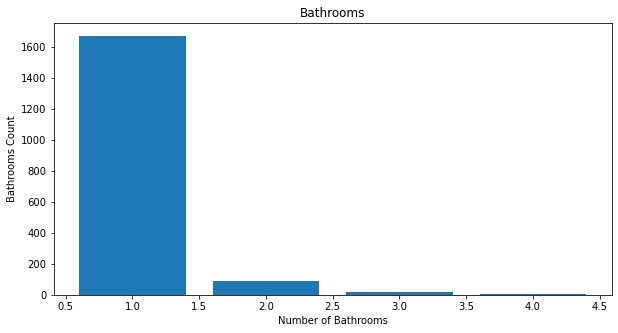

In [25]:
plots(cleaned,"Bathrooms",10,5)

**Almost all of the houses have one bathroom**

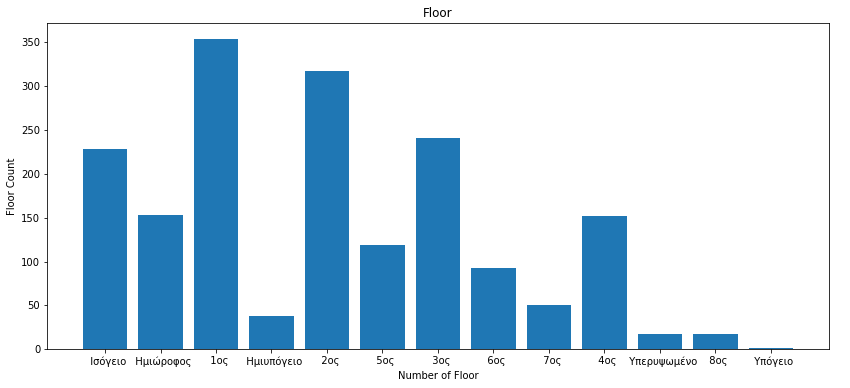

In [26]:
plots(cleaned,"Floor",14,6)

**The majority of the apartments are on the first 4 floors**

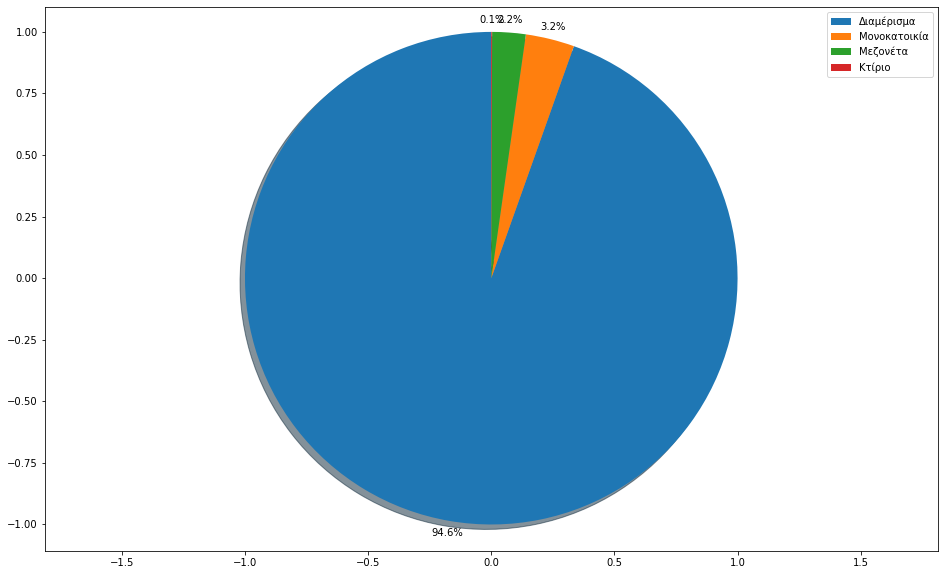

In [27]:
labels = cleaned["Type"].unique()
sizes = cleaned["Type"].value_counts()

fig1, ax1 = plt.subplots(figsize=(16, 10))
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90, frame=True, pctdistance=1.05)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels)
plt.show()

**We can observe the vast majority of our houses are apartments**

**Descriptive Statistics**

In [28]:
cleaned.describe()

,Bedrooms,Bathrooms,Year,Price/m2(€/m^2),Price(€),Surface m^2
count,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
mean,1.746914,1.076319,1982.615600,10.806397,727.136925,75.062290
std,0.829299,0.326295,15.917419,67.637323,5146.148586,54.056514
min,1.000000,1.000000,1900.000000,1.000000,50.000000,15.000000
25%,1.000000,1.000000,1970.000000,6.000000,370.000000,45.000000
50%,2.000000,1.000000,1979.000000,7.000000,450.000000,65.000000
75%,2.000000,1.000000,1994.000000,9.000000,600.000000,90.000000
max,7.000000,4.000000,2022.000000,2330.000000,205000.000000,900.000000


**We can see that the maximum values for Price and Price/m2 are far greater than the mean values**

**Boxplot Price/m2**

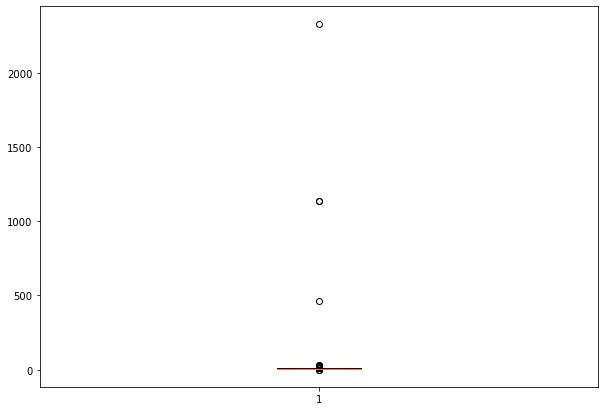

In [29]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(cleaned['Price/m2(€/m^2)'])
plt.show()

**We will remove the outliers using Z-score**

In [30]:
m=np.mean(cleaned['Price/m2(€/m^2)'])
s=np.std(cleaned['Price/m2(€/m^2)'])
cleaned1=cleaned[((cleaned['Price/m2(€/m^2)']>(m-s)) & (cleaned['Price/m2(€/m^2)']<=(m+s)))]
cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 1 to 2048
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Floor            1778 non-null   object
 1   Bedrooms         1778 non-null   int32 
 2   Bathrooms        1778 non-null   int32 
 3   Area             1778 non-null   object
 4   Year             1778 non-null   int32 
 5   Price/m2(€/m^2)  1778 non-null   int32 
 6   Price(€)         1778 non-null   int32 
 7   Type             1778 non-null   object
 8   Surface m^2      1778 non-null   int32 
dtypes: int32(6), object(3)
memory usage: 97.2+ KB


In [31]:
print(s)

67.61834289432728


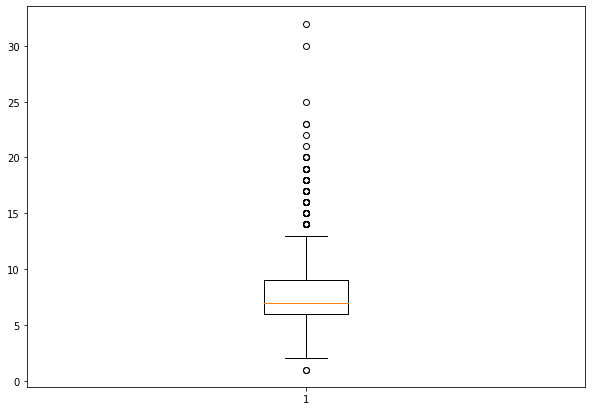

In [32]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(cleaned1['Price/m2(€/m^2)'])
plt.show()

**So much better now**

In [33]:
cleaned1['Price/m2(€/m^2)'].describe()

count    1778.000000
mean        7.981440
std         3.127239
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        32.000000
Name: Price/m2(€/m^2), dtype: float64

In [34]:
cleaned1.describe()

,Bedrooms,Bathrooms,Year,Price/m2(€/m^2),Price(€),Surface m^2
count,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000
mean,1.747469,1.076490,1982.593363,7.981440,549.920135,75.116423
std,0.829810,0.326642,15.915629,3.127239,460.268389,54.094869
min,1.000000,1.000000,1900.000000,1.000000,50.000000,15.000000
25%,1.000000,1.000000,1970.000000,6.000000,362.500000,45.000000
50%,2.000000,1.000000,1979.000000,7.000000,450.000000,65.000000
75%,2.000000,1.000000,1994.000000,9.000000,597.500000,90.000000
max,7.000000,4.000000,2022.000000,32.000000,12000.000000,900.000000


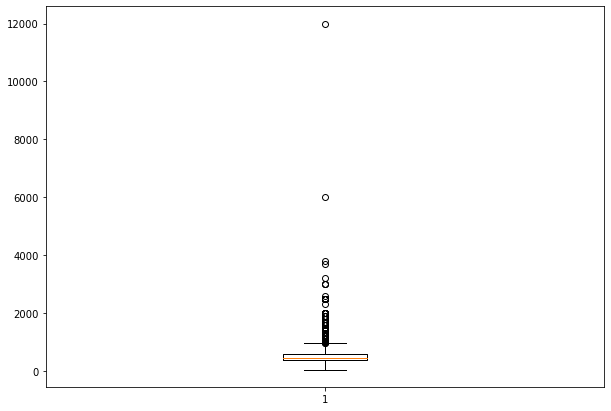

In [35]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(cleaned1['Price(€)'])
plt.show()

In [36]:
cleaned1.drop(index=(cleaned1.index[cleaned1['Price(€)']>=12000]), inplace=True)
cleaned1.describe()

C:\Users\user\AppData\Local\Temp\ipykernel_11440\1634593847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned1.drop(index=(cleaned1.index[cleaned1['Price(€)']>=12000]), inplace=True)


,Bedrooms,Bathrooms,Year,Price/m2(€/m^2),Price(€),Surface m^2
count,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000
mean,1.746201,1.074845,1982.571187,7.978616,543.476646,74.652223
std,0.828319,0.319281,15.892609,3.125850,371.624442,50.443635
min,1.000000,1.000000,1900.000000,1.000000,50.000000,15.000000
25%,1.000000,1.000000,1970.000000,6.000000,360.000000,45.000000
50%,2.000000,1.000000,1979.000000,7.000000,450.000000,65.000000
75%,2.000000,1.000000,1994.000000,9.000000,590.000000,90.000000
max,7.000000,4.000000,2022.000000,32.000000,6000.000000,650.000000


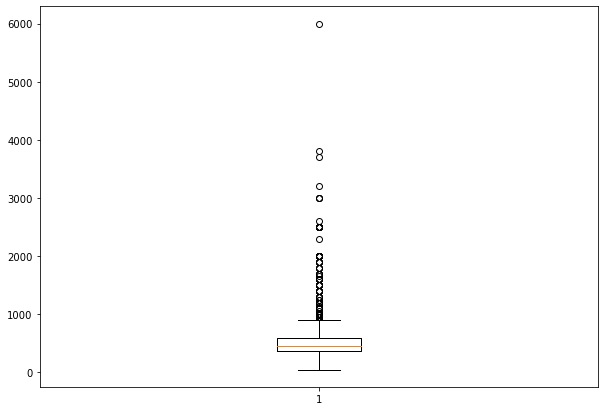

In [37]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(cleaned1['Price(€)'])
plt.show()

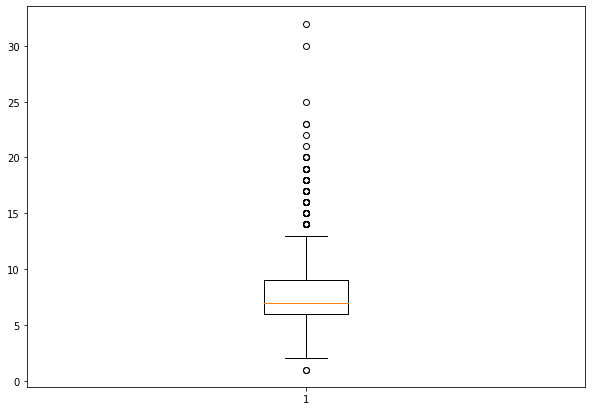

In [38]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(cleaned1['Price/m2(€/m^2)'])
plt.show()

In [39]:
cleaned1.tail()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
2042,Ημιώροφος,1,1,Ανω Πόλη,1970,5,390,Διαμέρισμα,75
2043,3ος,3,1,Ανω Πόλη,1966,8,600,Διαμέρισμα,80
2044,3ος,1,1,Ανω Πόλη,1980,9,400,Διαμέρισμα,43
2047,4ος,2,2,Ντεπώ,1981,13,1100,Διαμέρισμα,83
2048,4ος,1,1,Ανω Πόλη,1975,6,280,Διαμέρισμα,45


In [40]:
cleaned1.reset_index(drop=True, inplace=True)
cleaned1.tail()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
1772,Ημιώροφος,1,1,Ανω Πόλη,1970,5,390,Διαμέρισμα,75
1773,3ος,3,1,Ανω Πόλη,1966,8,600,Διαμέρισμα,80
1774,3ος,1,1,Ανω Πόλη,1980,9,400,Διαμέρισμα,43
1775,4ος,2,2,Ντεπώ,1981,13,1100,Διαμέρισμα,83
1776,4ος,1,1,Ανω Πόλη,1975,6,280,Διαμέρισμα,45


**Now that we cleaned our data from most of the outliers we again make a copy of our dataframe called  df**

In [41]:
df=cleaned1.copy()

In [42]:
df.head()

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2
0,Ισόγειο,1,1,Πολίχνη,2010,6,250,Διαμέρισμα,40
1,Ισόγειο,3,1,Other Area,1990,6,450,Μονοκατοικία,75
2,Ημιώροφος,1,1,Πολίχνη,1990,6,400,Διαμέρισμα,67
3,1ος,1,1,Πολίχνη,1989,7,230,Διαμέρισμα,32
4,Ημιυπόγειο,1,1,Πολίχνη,2005,4,120,Διαμέρισμα,30


### Linear Relationship

**Here we will examine the linear relationship between our Dependent Variable "Price" and the rest of the independent numerical variables using Regression plot**

(0.0, 6297.5)

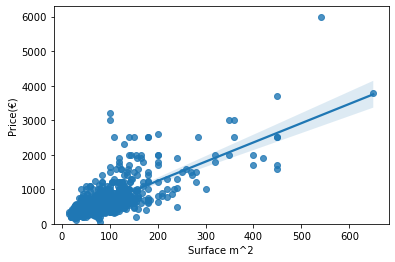

In [43]:
sns.regplot(x="Surface m^2", y="Price(€)", data=df)
plt.ylim(0,)

(0.0, 6297.5)

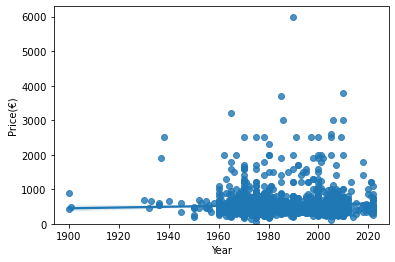

In [44]:
sns.regplot(x="Year", y="Price(€)", data=df)
plt.ylim(0,)

(0.0, 6297.5)

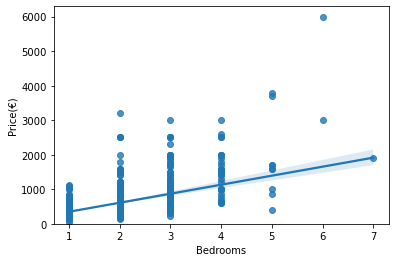

In [45]:
sns.regplot(x="Bedrooms", y="Price(€)", data=df)
plt.ylim(0,)

(0.0, 6297.5)

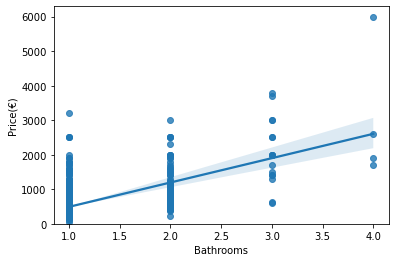

In [46]:
sns.regplot(x="Bathrooms", y="Price(€)", data=df)
plt.ylim(0,)

**All of our variabled have Postive linear Relationship**

**We can also use Residual Plot to examine if a Linear Model is appropriate according to our data**

<AxesSubplot:xlabel='Surface m^2', ylabel='Price(€)'>

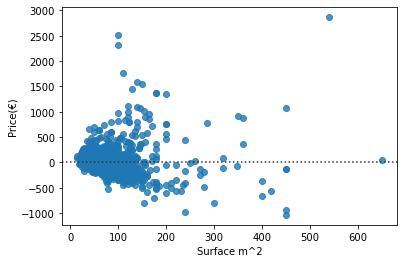

In [47]:
sns.residplot( x="Surface m^2",y="Price(€)", data=df)

<AxesSubplot:xlabel='Year', ylabel='Price(€)'>

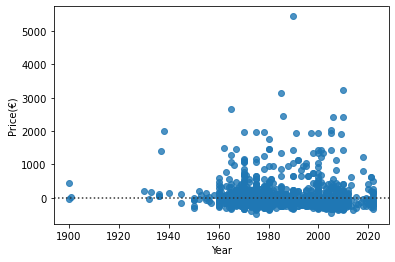

In [48]:
sns.residplot( x="Year", y="Price(€)",  data=df)

<AxesSubplot:xlabel='Bedrooms', ylabel='Price(€)'>

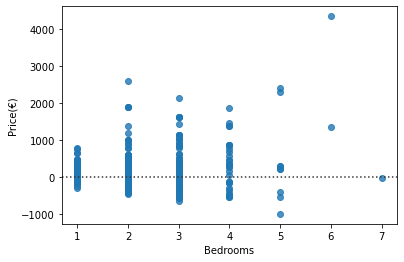

In [49]:
sns.residplot(x="Bedrooms",y="Price(€)",data=df)

<AxesSubplot:xlabel='Bathrooms', ylabel='Price(€)'>

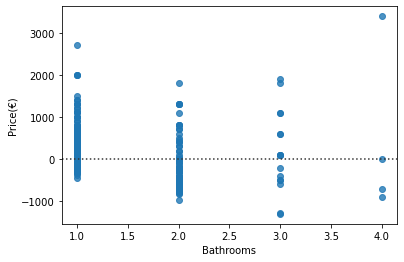

In [50]:
sns.residplot(x="Bathrooms",y="Price(€)",data=df)

**The conclusions are not very definitive since in most of our plots there is some symmetry but not a solid one. Although, it seems that a Linear Model might be appropriate.**

**Now lets examine the correlation between our target variable and the rest**

In [51]:
df.corr()['Price(€)'].sort_values()

Year               0.049145
Price/m2(€/m^2)    0.233794
Bedrooms           0.582091
Bathrooms          0.605844
Surface m^2        0.756564
Price(€)           1.000000
Name: Price(€), dtype: float64

**The variables Bedrooms,Bathrooms and Surface have a very strong correlation with out target variable Price**

### FEATURE ENGINEERING

**Since the correlation betweent Price and Year isn't that strong, we our gonna turn the year into 5 bins**

In [52]:
bins= np.linspace(min(df["Year"]), max(df["Year"]),6)

group_names=["Too Old",'Very Old', 'Old', 'Relatively New', "New"]

df['Year-binned']= pd.cut(df['Year'], bins, labels=group_names, include_lowest=True )
df.head(5)

,Floor,Bedrooms,Bathrooms,Area,Year,Price/m2(€/m^2),Price(€),Type,Surface m^2,Year-binned
0,Ισόγειο,1,1,Πολίχνη,2010,6,250,Διαμέρισμα,40,New
1,Ισόγειο,3,1,Other Area,1990,6,450,Μονοκατοικία,75,Relatively New
2,Ημιώροφος,1,1,Πολίχνη,1990,6,400,Διαμέρισμα,67,Relatively New
3,1ος,1,1,Πολίχνη,1989,7,230,Διαμέρισμα,32,Relatively New
4,Ημιυπόγειο,1,1,Πολίχνη,2005,4,120,Διαμέρισμα,30,New


Text(0, 0.5, 'Count')

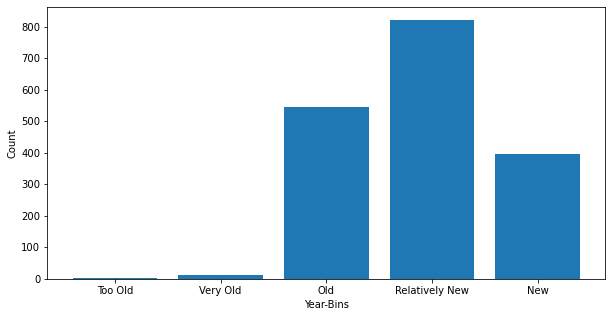

In [53]:
fig = plt.figure(figsize = (10, 5))
plt.bar(group_names,df["Year-binned"].value_counts(sort=False))
plt.xlabel("Year-Bins")
plt.ylabel("Count")

Text(0.5, 1.0, 'Year bins')

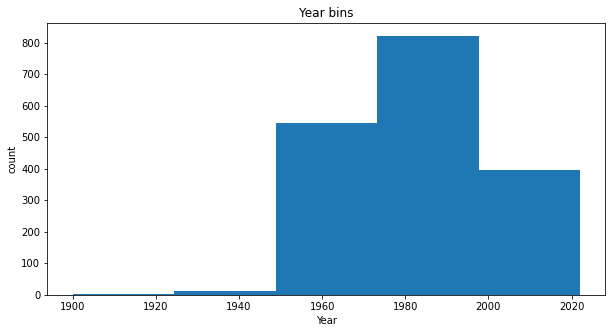

In [54]:
fig=plt.figure(figsize=(10,5))
plt.hist(df["Year"], len(group_names))
plt.xlabel("Year")
plt.ylabel("count")
plt.title("Year bins")

In [55]:
table = pd.pivot_table(df, values="Price/m2(€/m^2)", index=['Year-binned'],
                     aggfunc= np.mean)
table.reset_index()

,Year-binned,Price/m2(€/m^2)
0,Too Old,7.666667
1,Very Old,10.000000
2,Old,8.293040
3,Relatively New,7.514007
4,New,8.454545


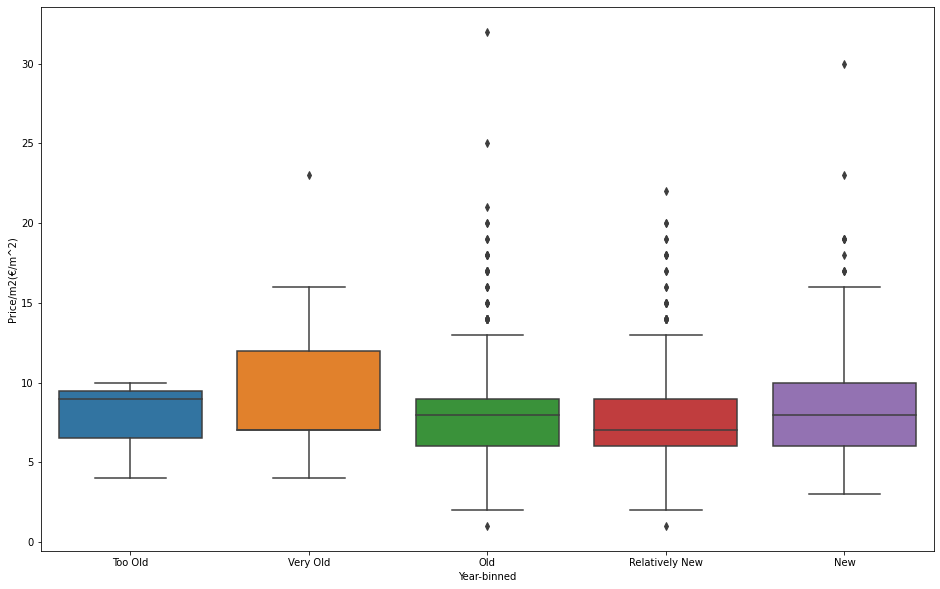

In [56]:
plt.figure(figsize=(16, 10))
sns.boxplot(x="Year-binned", y="Price/m2(€/m^2)", data=df);

In [57]:
#Dropping column Year 
df.drop(columns=["Year"], axis=1, inplace=True)
df.head()

,Floor,Bedrooms,Bathrooms,Area,Price/m2(€/m^2),Price(€),Type,Surface m^2,Year-binned
0,Ισόγειο,1,1,Πολίχνη,6,250,Διαμέρισμα,40,New
1,Ισόγειο,3,1,Other Area,6,450,Μονοκατοικία,75,Relatively New
2,Ημιώροφος,1,1,Πολίχνη,6,400,Διαμέρισμα,67,Relatively New
3,1ος,1,1,Πολίχνη,7,230,Διαμέρισμα,32,Relatively New
4,Ημιυπόγειο,1,1,Πολίχνη,4,120,Διαμέρισμα,30,New


## One hot encoding - Dummy Variables

In [58]:
dummy0=pd.get_dummies(df["Year-binned"])
dummy0.head()

,Too Old,Very Old,Old,Relatively New,New
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,1


In [59]:
dummy1=pd.get_dummies(df["Type"])
dummy1.head()

,Διαμέρισμα,Κτίριο,Μεζονέτα,Μονοκατοικία
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [60]:
dummy2=pd.get_dummies(df["Floor"])
dummy2.head()

,1ος,2ος,3ος,4ος,5ος,6ος,7ος,8ος,Ημιυπόγειο,Ημιώροφος,Ισόγειο,Υπερυψωμένο,Υπόγειο
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [61]:
dummy3=pd.get_dummies(df["Area"])
dummy3.head()

,40 Εκκλησιές,Other Area,Άγιος Παύλος Αγιος Παύλος,Αμπελόκηποι,Ανάληψη,Ανω Πόλη,Ανω Τούμπα,Βαρδάρη,Εύοσμος,Κάτω Τούμπα,...,Περαία,Πολίχνη,Πυλαία,Σταυρούπολη,Συκιές,Τριανδρία,Φάληρο,ΧΑΝΘ,Χαριλάου,Ωραιόκαστρο
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
final_df=pd.concat([df,dummy0, dummy1, dummy2, dummy3], axis=1)
final_df.drop(["Type", "Floor","Area","Price/m2(€/m^2)","Year-binned"], axis=1, inplace=True)

## Model Development

### Linear Regression

**First lets try a Linear Regression Model using the variable with the highest correlation which is "Surface m^2"**

In [63]:
X=final_df[["Surface m^2"]]
X

,Surface m^2
0,40
1,75
2,67
3,32
4,30
...,...
1772,75
1773,80
1774,43
1775,83


In [64]:
y=final_df["Price(€)"]
y

0        250
1        450
2        400
3        230
4        120
        ... 
1772     390
1773     600
1774     400
1775    1100
1776     280
Name: Price(€), Length: 1777, dtype: int32

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.13, random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [68]:
print("The R^2 error for the training set is: {}".format(round(lr.score(X_train, y_train),3)))
print("The R^2 error for the testing set is: {}".format(round(lr.score(X_test, y_test),3)))

The R^2 error for the training set is: 0.572
The R^2 error for the testing set is: 0.569


In [69]:
print("The MAE error for the training set is: {}".format(round(lr.score(X_train, y_train),3)))
print("The MAE error for the testing set is: {}".format(round(lr.score(X_test, y_test),3)))

The MAE error for the training set is: 0.572
The MAE error for the testing set is: 0.569


**Lets try to use a Multiple Linear Regression model and watch if the accuracy is increased**

### Multiple Linear Regression

In [70]:
Z=final_df.drop(columns=["Price(€)"], axis=1)
Z

,Bedrooms,Bathrooms,Surface m^2,Too Old,Very Old,Old,Relatively New,New,Διαμέρισμα,Κτίριο,...,Περαία,Πολίχνη,Πυλαία,Σταυρούπολη,Συκιές,Τριανδρία,Φάληρο,ΧΑΝΘ,Χαριλάου,Ωραιόκαστρο
0,1,1,40,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,3,1,75,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,67,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,32,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,30,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1,1,75,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1773,3,1,80,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1774,1,1,43,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1775,2,2,83,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
Z_train, Z_test, y_train, y_test= train_test_split(Z, y, test_size=0.13, random_state=10)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric=["Bedrooms","Bathrooms","Surface m^2"]
Z_train[numeric]=scaler.fit_transform(Z_train[numeric])
Z_test[numeric]=scaler.transform(Z_test[numeric])

In [73]:
lr.fit(Z_train, y_train)

LinearRegression()

In [74]:
print("The R^2 error for the training set is: {}".format(round(lr.score(Z_train, y_train),3)))
print("The R^2 error for the testing set is: {}".format(round(lr.score(Z_test, y_test),3)))

The R^2 error for the training set is: 0.677
The R^2 error for the testing set is: 0.675


**As we can see the accuracy of the model has increased**

In [75]:
yhat=lr.predict(Z_test)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("The MAE is:{}".format(round(mean_absolute_error(y_test, yhat),2)))
print("The MSE is:{}".format(round((mean_squared_error(y_test, yhat)))))

The MAE is:135.09
The MSE is:50675


In [77]:
def fitplot(y,yhat,kind):
    
    plt.figure(figsize=(14,10))

    ax1=sns.distplot(y, hist=False, color='r', label="Actual Value")
    sns.distplot(yhat, hist=False, color='b', label= 'Predicted Values', ax=ax1)

    plt.title('Actual vs Predicted Values ({})'.format(kind))
    plt.xlabel('Price (€)')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\user\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


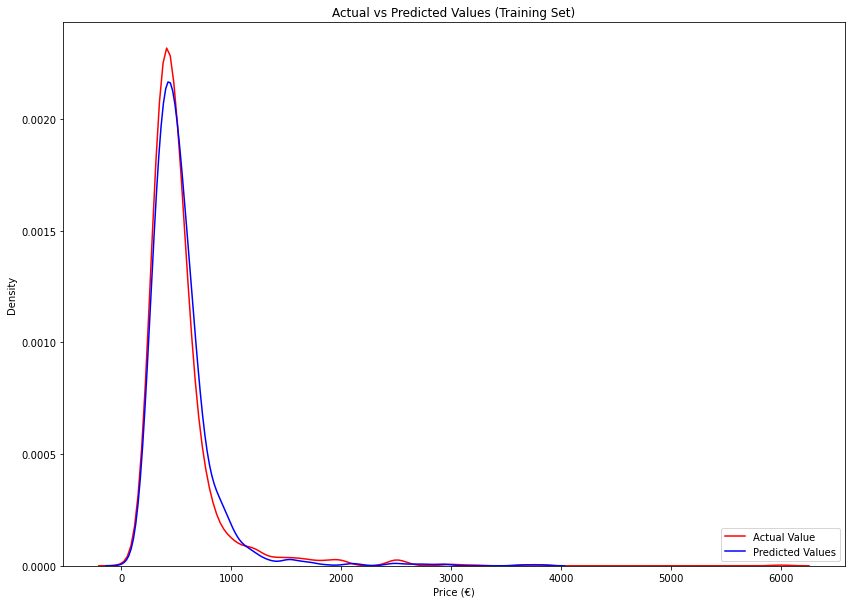

In [78]:
y_train_hat=lr.predict(Z_train)
fitplot(y_train,y_train_hat,"Training Set")

C:\Users\user\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


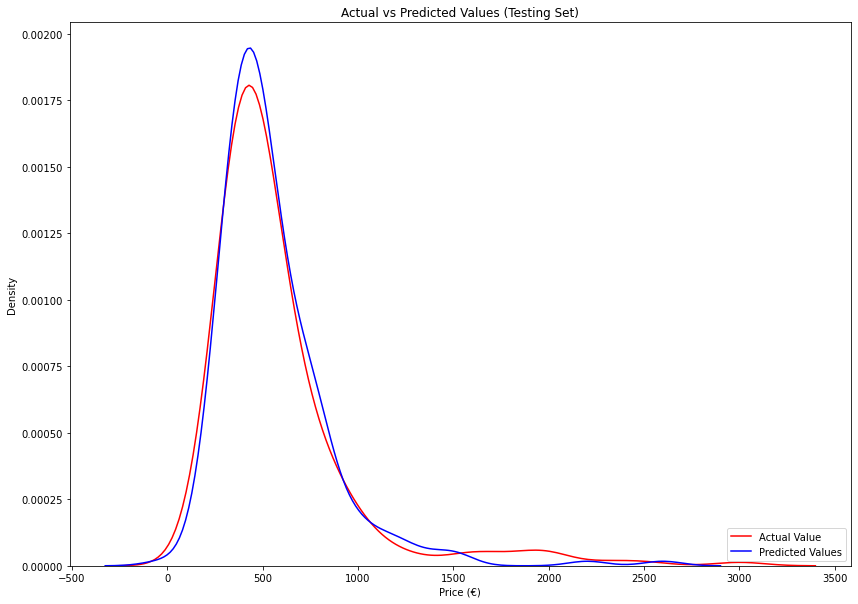

In [79]:
fitplot(y_test,yhat,"Testing Set")

In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.13, random_state=0)

S=cross_val_score(LinearRegression(), Z, y, cv=cv)
S

array([0.7765975 , 0.70541605, 0.53627144, 0.64470404, 0.64881605])

In [81]:
print(round(S.mean(),5),",", round(S.std(),5))

0.66236 , 0.07912


In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge

def find_best_model(Z_train,y_train):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
            'alpha': [1,2],
            'selection':['random','cyclic']
        }
    },
    'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter':['best','random']
            }
        },
        'ridge_regression':{
            'model':Ridge(),
            'params':{
                'alpha':[1,5,7,10,100],
                'solver':['auto', 'svd'],
            }
        }
    }
    score=[]
    cv=ShuffleSplit(n_splits=10, test_size=0.13, random_state=0)
    for algo, config in algos.items():
        gs= GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(Z,y)
        score.append({
            'model':algo,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })    
    return pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
                


                         
                                
                
find_best_model(Z_test,y_test)    
        

C:\Users\user\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\user\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

,model,best_score,best_params
0,linear_regression,0.610729,{'normalize': False}
1,lasso,0.605338,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.382832,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,ridge_regression,0.614758,"{'alpha': 10, 'solver': 'svd'}"


**We can conclude that the best models for the prediction of the rent price is the Multiple Linear and Ridge Regression**